In [2]:
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
print(star_wars.head(10))
star_wars = star_wars[pd.notnull(star_wars['RespondentID'])]
print(star_wars.shape)


   RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
0           NaN                                           Response             
1  3.292880e+09                                                Yes             
2  3.292880e+09                                                 No             
3  3.292765e+09                                                Yes             
4  3.292763e+09                                                Yes             
5  3.292731e+09                                                Yes             
6  3.292719e+09                                                Yes             
7  3.292685e+09                                                Yes             
8  3.292664e+09                                                Yes             
9  3.292654e+09                                                Yes             

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
0                                           

In [3]:
yes_no = {'Yes':True, 'No':False}
for col in ['Have you seen any of the 6 films in the Star Wars franchise?','Do you consider yourself to be a fan of the Star Wars film franchise?']:
    star_wars[col] = star_wars[col].map(yes_no)


In [4]:

mov_nan = {"Star Wars: Episode I  The Phantom Menace": True, 'NaN': False, 'Star Wars: Episode II  Attack of the Clones':True, "Star Wars: Episode III  Revenge of the Sith": True, "Star Wars: Episode IV  A New Hope":True, "Star Wars: Episode V The Empire Strikes Back": True, "Star Wars: Episode VI Return of the Jedi":True}
for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(mov_nan)
star_wars = star_wars.rename(columns={'Which of the following Star Wars films have you seen? Please select all that apply.':'seen_1', "Unnamed: 4":'seen_2', 'Unnamed: 5': 'seen_3', 'Unnamed: 6':'seen_4', 'Unnamed: 7':'seen_5', 'Unnamed: 8':'seen_6'})
print(star_wars.head())


   RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
1  3.292880e+09                                               True             
2  3.292880e+09                                              False             
3  3.292765e+09                                               True             
4  3.292763e+09                                               True             
5  3.292731e+09                                               True             

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
1                                               True                      
2                                                NaN                      
3                                              False                      
4                                               True                      
5                                               True                      

  seen_1 seen_2 seen_3 seen_4 seen_5 seen_6  \
1   True   True   Tru

In [5]:
star_wars = star_wars.rename(columns={'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.':'ranking_1', 'Unnamed: 10': 'ranking_2', 'Unnamed: 11':'ranking_3', 'Unnamed: 12':'ranking_4', 'Unnamed: 13':'ranking_5', 'Unnamed: 14':'ranking_6'})
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)
print(star_wars.iloc[:,9:15])

      ranking_1  ranking_2  ranking_3  ranking_4  ranking_5  ranking_6
1           3.0        2.0        1.0        4.0        5.0        6.0
2           NaN        NaN        NaN        NaN        NaN        NaN
3           1.0        2.0        3.0        4.0        5.0        6.0
4           5.0        6.0        1.0        2.0        4.0        3.0
5           5.0        4.0        6.0        2.0        1.0        3.0
6           1.0        4.0        3.0        6.0        5.0        2.0
7           6.0        5.0        4.0        3.0        1.0        2.0
8           4.0        5.0        6.0        3.0        2.0        1.0
9           5.0        4.0        6.0        2.0        1.0        3.0
10          1.0        2.0        3.0        4.0        5.0        6.0
11          NaN        NaN        NaN        NaN        NaN        NaN
12          NaN        NaN        NaN        NaN        NaN        NaN
13          3.0        4.0        5.0        6.0        1.0        2.0
14    

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64


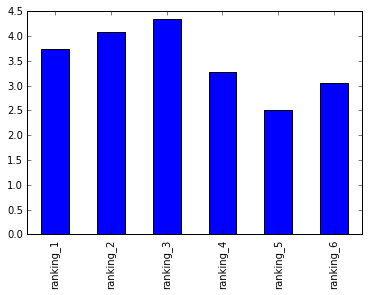

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
col = star_wars[star_wars.columns[9:15]]
colmean = col.mean()
colmean.plot.bar()
print(colmean)



It can be observed that the rankings topped up at the third film and then rankings started to get lower.  It could be that fans were getting enough until the third film.  Possibly the long time it took to release the last film, helped to get better rankings for this one.

seen_1    673.0
seen_2    571.0
seen_3    550.0
seen_4    607.0
seen_5    758.0
seen_6    738.0
dtype: float64
True    571
Name: seen_2, dtype: int64


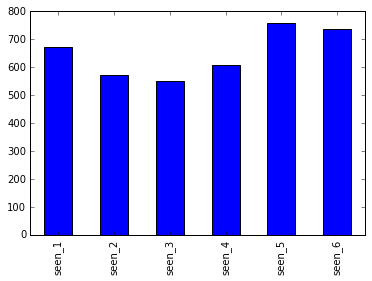

In [7]:
cols = star_wars[star_wars.columns[3:9]]
colsum = star_wars[star_wars.columns[3:9]].sum()
colsum.plot.bar()
print(colsum)
print(star_wars["seen_2"].value_counts())

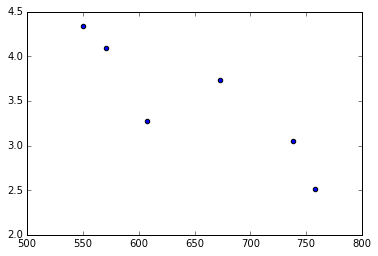

0    3.732934
1    4.087321
3    4.341317
4    3.272727
5    2.513158
6    3.047847
dtype: float64


-0.87812649413847021

In [8]:
x = colsum
y = colmean
plt.scatter(x, y)
plt.show()
new_index=[1,2,3,4,5,6]
colsumreind = colsum.rename({'seen_1':0,'seen_2':1,'seen_3':3, 'seen_4':4, 'seen_5':5, 'seen_6':6,})
colmeanreind = colmean.rename({'ranking_1':0,'ranking_2':1,'ranking_3':3, 'ranking_4':4, 'ranking_5':5, 'ranking_6':6,})
print(colmeanreind)
colsumreind.corr(colmeanreind)


Film 1, 5 and 6 were the most popular films.  These results are opposite to the rankings given by fans where the best rankings were given to film 3. The correlation between the two results (rankings and views) is strongly negative.

[361.0, 323.0, 317.0, 342.0, 392.0, 387.0]
[298.0, 237.0, 222.0, 255.0, 353.0, 338.0]


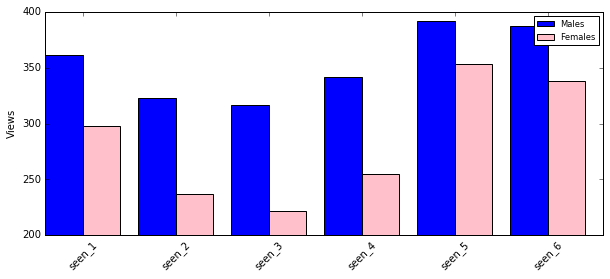

In [84]:
import numpy as np
malesp = star_wars[star_wars["Gender"] == "Male"][star_wars.columns[3:9]].sum()

femalesp = star_wars[star_wars["Gender"] == "Female"][star_wars.columns[3:9]].sum()

malesr = star_wars[star_wars["Gender"] == "Male"][star_wars.columns[9:15]].mean()
femalesr = star_wars[star_wars["Gender"] == "Female"][star_wars.columns[9:15]].mean()

malesl = malesp.tolist()
femalesl = femalesp.tolist()
print(malesl)
print(femalesl)
N = 6 #number of movies
ind = np.arange(N)  
width = 0.4   # the width of the bars

fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)

rects1 = ax.bar(ind, malesl, width, color='b')
rects2 = ax.bar(ind+width, femalesl, width, color='pink')
ax.set_ylabel('Views')
ax.set_xticks(ind+width)
ax.set_ylim(200)
ax.set_xticklabels( ('seen_1','seen_2','seen_3','seen_4','seen_5','seen_6'),rotation=45 )
ax.legend((rects1[0], rects2[0]), ('Males', 'Females'), fontsize = 'small')

plt.show()




[4.037825059101655, 4.224586288416075, 4.274881516587678, 2.9976359338061465, 2.458628841607565, 3.0023640661938535]
[3.4292929292929295, 3.954659949622166, 4.418136020151134, 3.544080604534005, 2.5692695214105794, 3.0780856423173804]


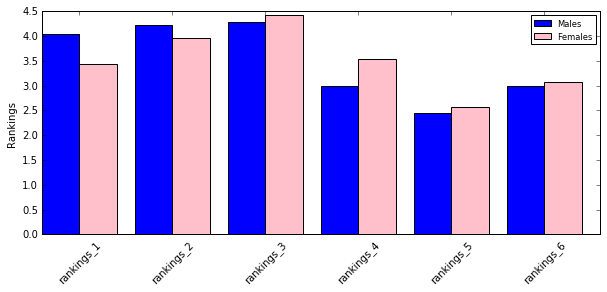

(549, 38)
(497, 38)


In [85]:
malesrl = malesr.tolist()
femalesrl = femalesr.tolist()
print(malesrl)
print(femalesrl)

N = 6 #number of movies
ind = np.arange(N)  
width = 0.4   # the width of the bars

fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)

rects1b = ax.bar(ind, malesrl, width, color='b')
rects2b = ax.bar(ind+width, femalesrl, width, color='pink')
ax.set_ylabel('Rankings')
ax.set_xticks(ind+width)
#ax.set_ylim(200)
ax.set_xticklabels( ('rankings_1','rankings_2','rankings_3','rankings_4','rankings_5','rankings_6'),rotation=45 )
ax.legend((rects1b[0], rects2b[0]), ('Males', 'Females'), fontsize = 'small')

plt.show()
print(star_wars["Gender"].value_counts())


Both female and male rankings and views for the films have similar results. While for views the most popular film for both genders was film 5, film 3 had the hightes ranking.  Interesting to notice that there were not as many views per film for Females than for Males.  Females did rank films 3 to 6 higher than males. 

In [96]:
print(star_wars["Which character shot first?"].value_counts())
print(star_wars.columns[15:29])


Han                                 325
I don't understand this question    306
Greedo                              197
Name: Which character shot first?, dtype: int64
Index(['Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28'],
      dtype='object')
